In [403]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames
using Statistics

## ZAD 1
Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

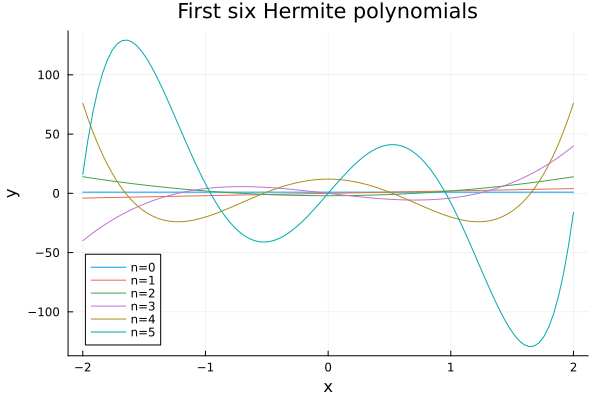

In [404]:
base = [1]
plot(Hermite(base), -2, 2, label="n=0")

for n in 1:5
    base = [0 for _ in 1:n]
    push!(base, 1)
    h = Hermite(base)
    plot!(h, -2, 2, label="n=$n")
end

xlabel!("x")
ylabel!("y")
title!("First six Hermite polynomials")

## ZAD 2
Narysować 6 pierwszych funkcji bazowych

In [405]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2))
    # normalize
    if norm
        return normalize(app)
    end
    return app
end;

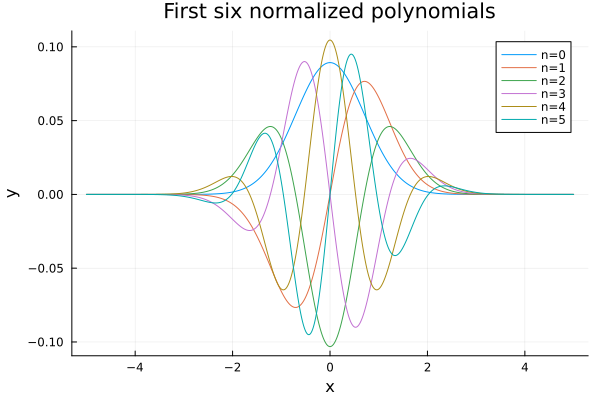

In [406]:
xx = -5:0.01:5
plot(xx, base_fun(0, xx), label="n=0")

for n in 1:5
    plot!(xx, base_fun(n, xx), label="n=$n")
end

xlabel!("x")
ylabel!("y")
title!("First six normalized polynomials")

## ZAD3
Pokazać, że same wielomiany nie są ortogonane, ale już z funkcją wagową $exp(-x^2)$ są. Uzyć metody z wektorami wartości, założyć pewien przedział.

In [407]:
function base_h(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    return H_k
end;

In [408]:
H = [base_h(i, xx) for i in 0:5];
F_wage = [base_fun(i, xx) for i in 0:5];


In [409]:
not_wage = Array{Float64, 2}(undef, 6, 6)
for (i, f_i) in enumerate(H) 
    for (j, f_j) in enumerate(H)
        not_wage[i,j] = dot(f_i, f_j)
    end
end
not_wage

6×6 Matrix{Float64}:
  1001.0             -5.32907e-14  …   1.62082e6     7.27596e-11
    -5.32907e-14  33433.4             -8.73115e-11   1.05665e8
 31431.4              2.72848e-12      1.16899e8     1.86265e-9
    -4.54747e-13      1.80941e6       -2.32831e-8    7.82081e9
     1.62082e6       -8.73115e-11      8.08696e9    -1.43051e-6
     7.27596e-11      1.05665e8    …  -1.43051e-6    5.40772e11

In [410]:
wage = Array{Float64, 2}(undef, 6, 6)
for (i, f_i) in enumerate(F_wage) 
    for (j, f_j) in enumerate(F_wage)
        wage[i,j] = dot(f_i, f_j)
    end
end
wage

6×6 Matrix{Float64}:
  1.0          -9.02828e-19  -0.57735      …   0.29277      -3.0177e-19
 -9.02828e-19   1.0           6.65923e-19     -6.60182e-18   0.48795
 -0.57735       6.65923e-19   1.0             -0.845154      4.71116e-18
 -3.48042e-18  -0.774597     -1.65948e-18     -7.73318e-18  -0.881917
  0.29277      -6.60182e-18  -0.845154         1.0          -5.41969e-18
 -3.0177e-19    0.48795       4.71116e-18  …  -5.41969e-18   1.0

Macierz dla wektorów znormalizowanych jest symetryczna i na przekątnych mamy wartości 1, zatem są one wektorami ortonormalnymi.

## ZAD4
Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V.

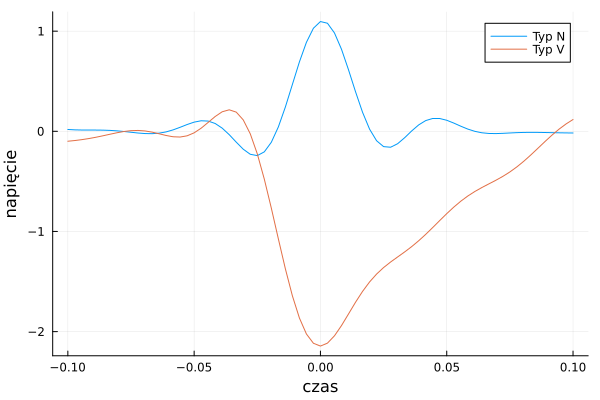

In [411]:
ekg_data = CSV.read("ecg_data.csv", DataFrame);
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

In [412]:
n = 3;

xx_ekg = ekg_data.time*40;

In [413]:
function type_v(n)
    yy_ekgV = ekg_data.signalV
    Y = [base_fun(i,xx_ekg) for i in 0:n]
    C = [dot(yy_ekgV, Y[i]) for i in 1:n+1]
    V = [C[i]*Y[i] for i in 1:n+1]
    V_add = [yy_ekgV]
    errors = []
    for i in 1:n+1
        push!(V_add, sum(V[1:i]))
        error = (yy_ekgN - V_add[i+1]).^2
        push!(errors, error)
    end
    return V_add, errors
end;

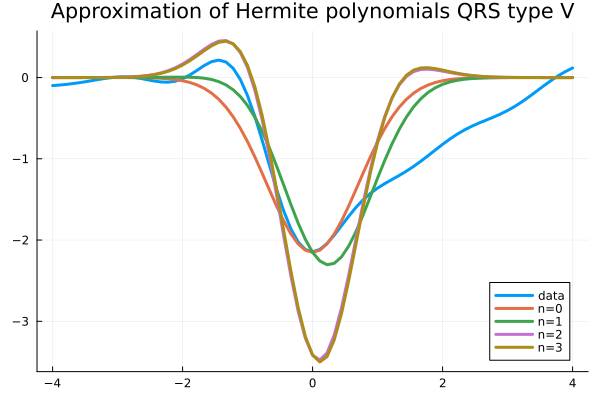

In [414]:
V_add, errors = type_v(n)

plot(
    xx_ekg, 
    V_add,
    label = ["data" "n=0" "n=1" "n=2" "n=3" "n=4" "n=5"],
    linewidth=3,
    title="Approximation of Hermite polynomials QRS type V"
)

In [415]:
function type_n(n)
    yy_ekgN = ekg_data.signalN
    Y = [base_fun(i,xx_ekg) for i in 0:n]
    C = [dot(yy_ekgN, Y[i]) for i in 1:n+1]
    V = [C[i]*Y[i] for i in 1:n+1]
    V_add = [yy_ekgN]
    errors = []
    for i in 1:n+1
        push!(V_add, sum(V[1:i]))
        error =mean( (yy_ekgN - V_add[i]).^2 )
        push!(errors, error)
    end
    return V_add, errors
end;

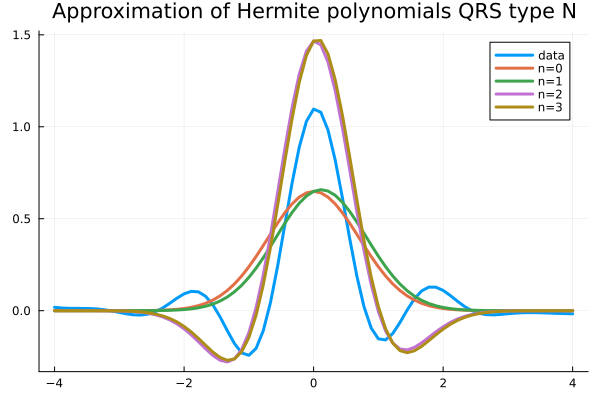

In [416]:
V_add, errors = type_n(n)

plot(
    xx_ekg, 
    V_add,
    label = ["data" "n=0" "n=1" "n=2" "n=3" "n=4" "n=5"],
    linewidth=3,
    title="Approximation of Hermite polynomials QRS type N"
)

## ZAD5 
Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

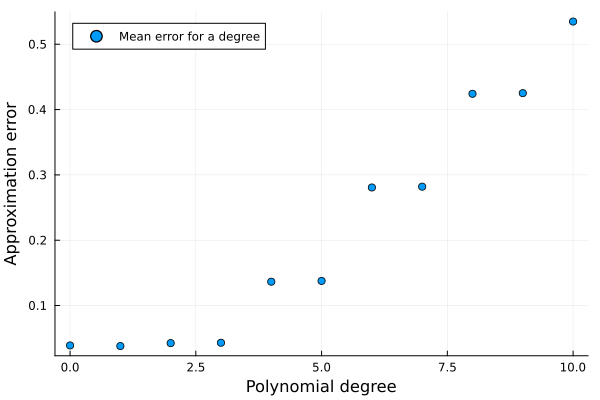

In [433]:
n = 11
res, errors = type_n(n)


scatter(
    0:n-1,
    errors[2:n+1], 
    label = "Mean error for a degree",
    xlabel="Polynomial degree", 
    ylabel="Approximation error"
)